In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Uitgebreide_VKM_dataset_cleaned.csv")

dataframe = df.copy()

In [2]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     208 non-null    int64  
 1   name                   208 non-null    object 
 2   shortdescription       208 non-null    object 
 3   description            208 non-null    object 
 4   content                208 non-null    object 
 5   studycredit            208 non-null    int64  
 6   location               208 non-null    object 
 7   contact_id             208 non-null    int64  
 8   level                  208 non-null    object 
 9   learningoutcomes       208 non-null    object 
 10  module_tags            208 non-null    object 
 11  interests_match_score  208 non-null    float64
 12  popularity_score       208 non-null    int64  
 13  estimated_difficulty   208 non-null    int64  
 14  available_spots        208 non-null    int64  
 15  start_

Descriptive Statistics:



,studycredit,interests_match_score,popularity_score,estimated_difficulty,available_spots
mean,21.490385,0.610096,252.471154,3.177885,49.764423
median,15.000000,0.620000,259.000000,3.000000,49.000000
min,15.000000,0.300000,10.000000,1.000000,20.000000
max,30.000000,0.940000,500.000000,5.000000,80.000000
std,7.449664,0.193586,141.795011,1.481640,17.994827


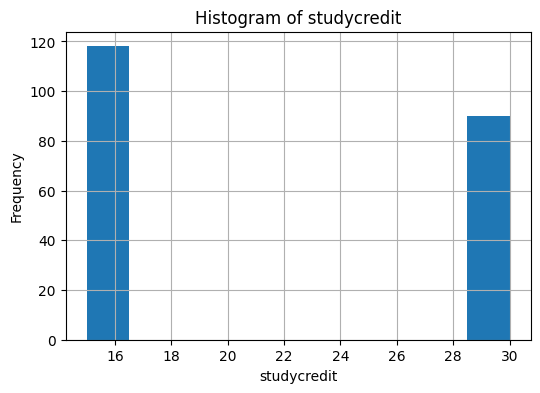

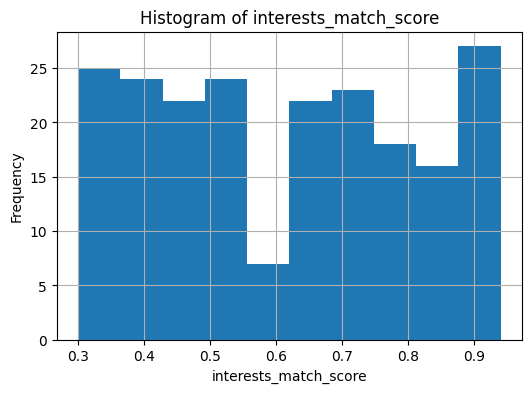

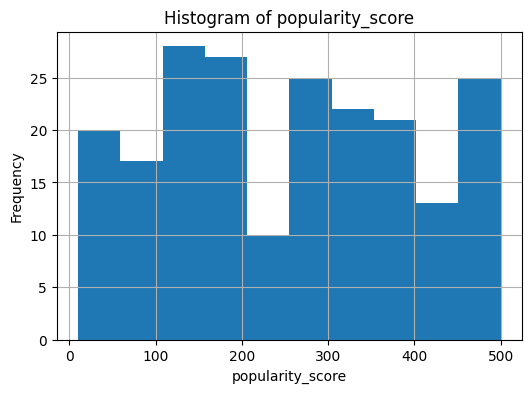

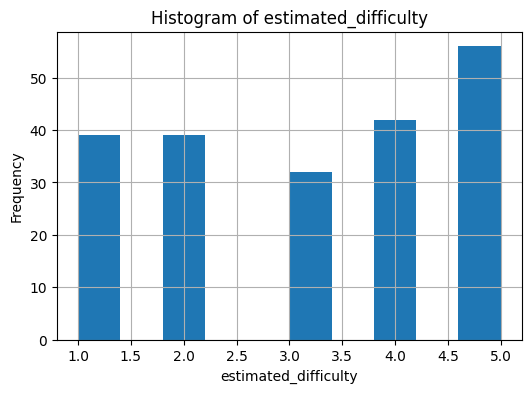

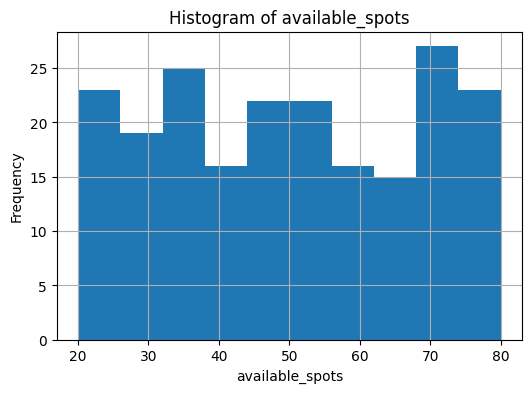

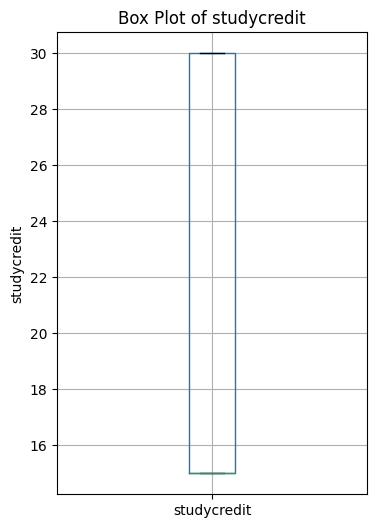

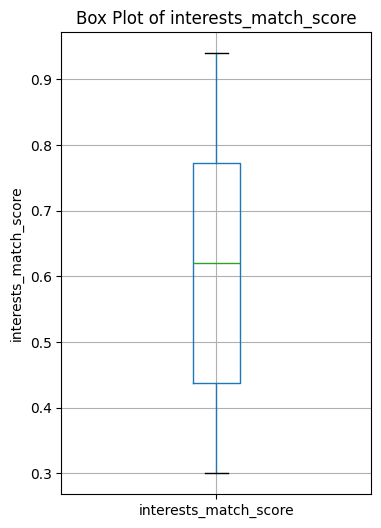

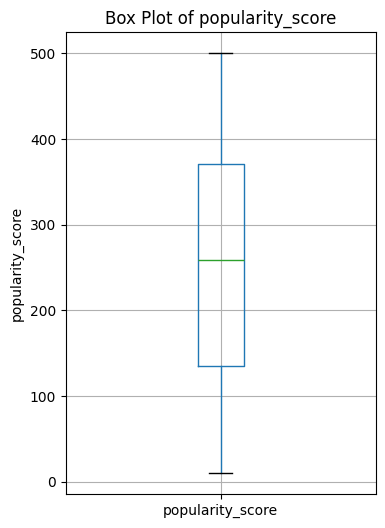

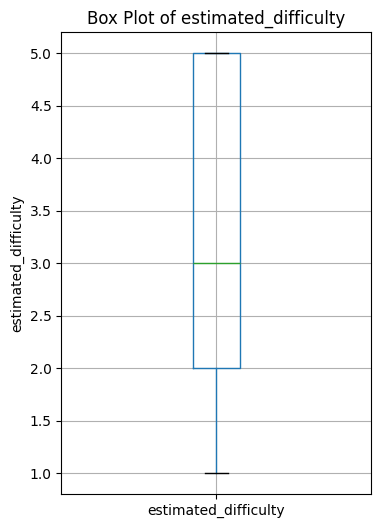

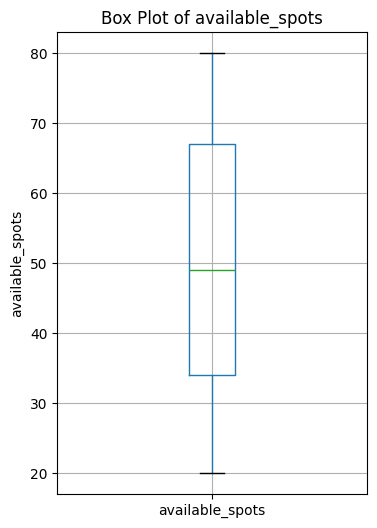

In [8]:
# Columns to analyze
num_cols = [
    "studycredit",
    "interests_match_score",
    "popularity_score",
    "estimated_difficulty",
    "available_spots"
]

# --- Descriptive Statistics ---
stats = dataframe[cols].agg(['mean', 'median', 'min', 'max', 'std'])
print("Descriptive Statistics:\n")
display(stats)

# --- Histograms ---
for col in num_cols:
    plt.figure(figsize=(6,4))
    dataframe[col].hist()
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# --- Box Plots ---
for col in num_cols:
    plt.figure(figsize=(4,6))
    dataframe.boxplot(column=col)
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()

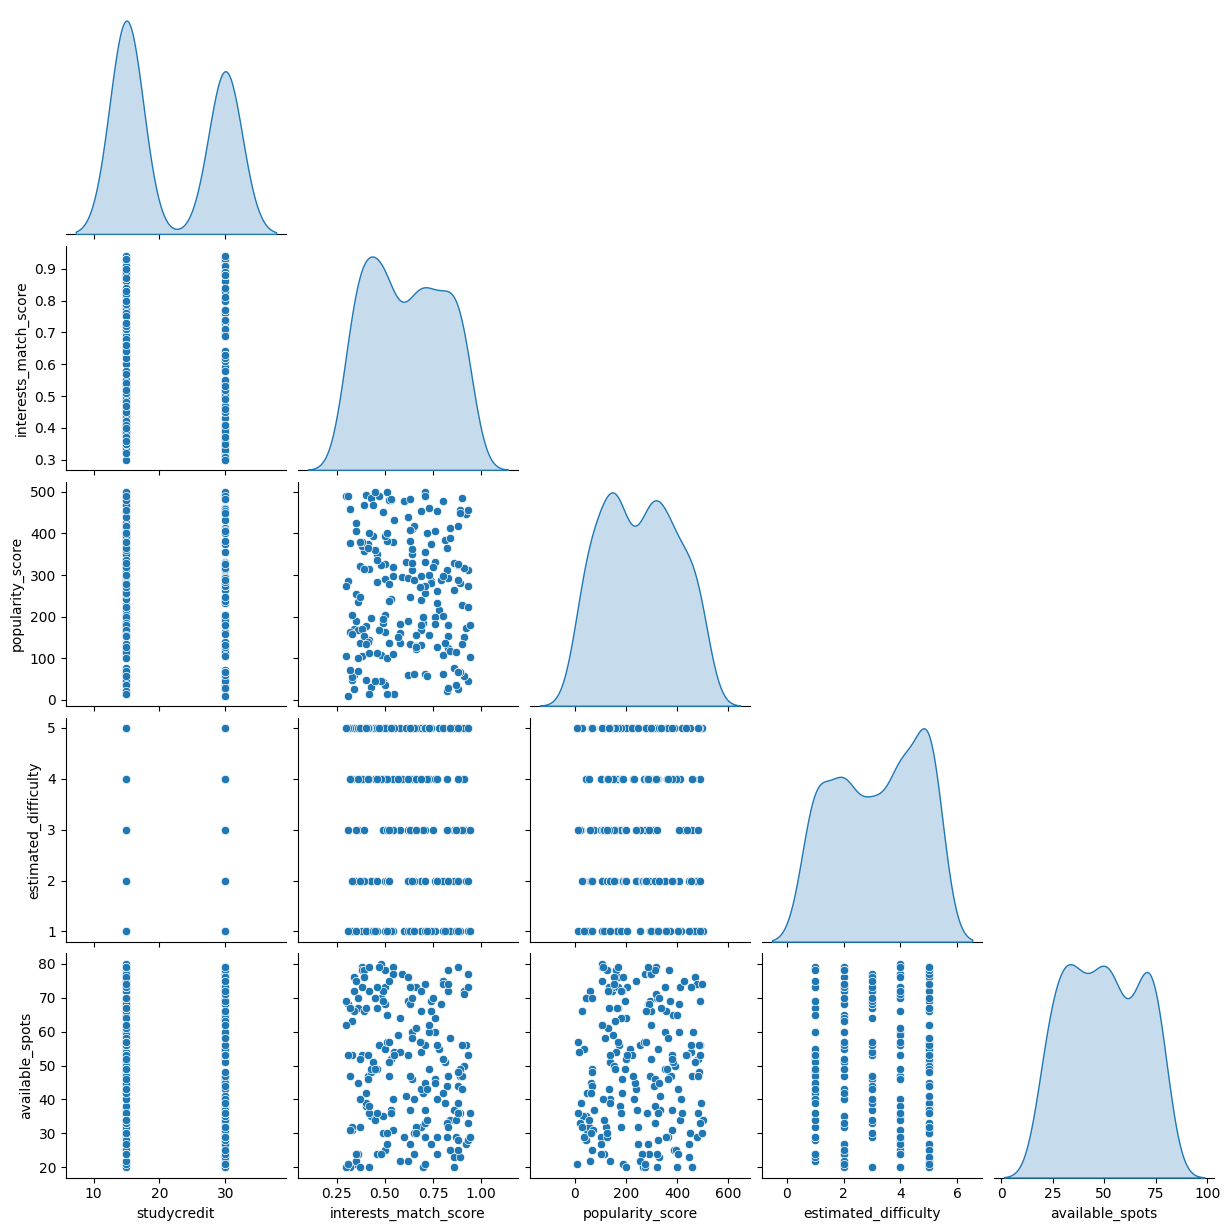

In [7]:
sns.pairplot(dataframe[num_cols], diag_kind="kde", corner=True)
plt.show()

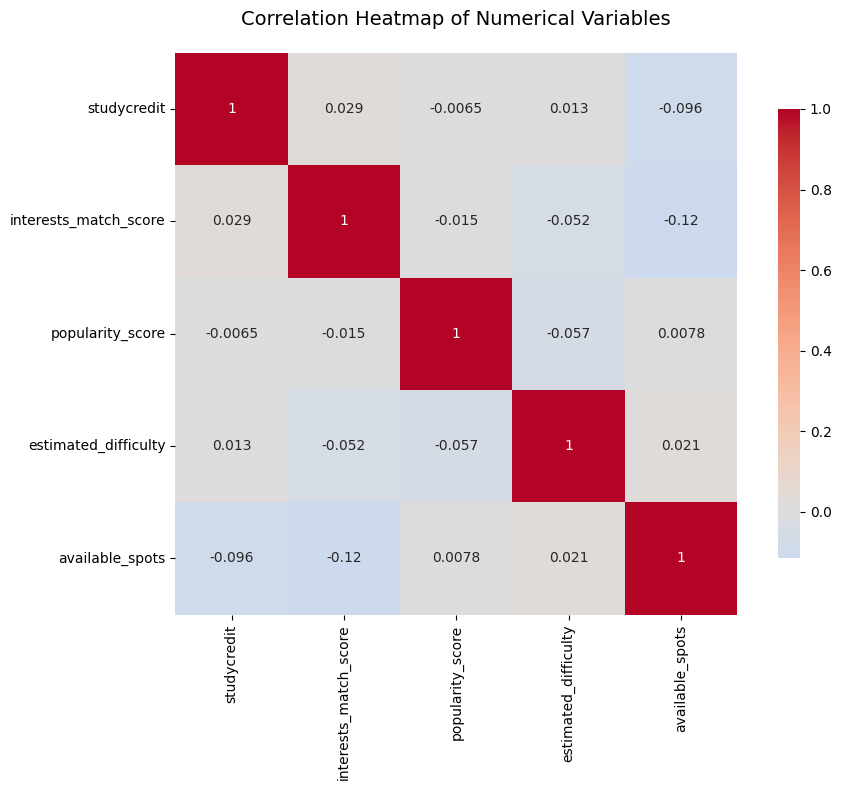

In [14]:
# --- Correlation Heatmap ---
plt.figure(figsize=(10, 8))
correlation_matrix = dataframe[num_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colormap at 0
            square=True,          # Make cells square            # Format numbers to 2 decimal places
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap of Numerical Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


=== Modules zonder module_tags ===
Aantal modules zonder tags: 0

=== Top 15 meest voorkomende tags ===
zorg: 21
welzijn: 15
onderzoek: 13
data: 13
design: 12
interdisciplinair: 12
innovatie: 12
persoonlijke: 10
ontwikkeling: 10
storytelling: 10
smart: 9
denken: 8
bouwen: 7
industry: 7
health: 6



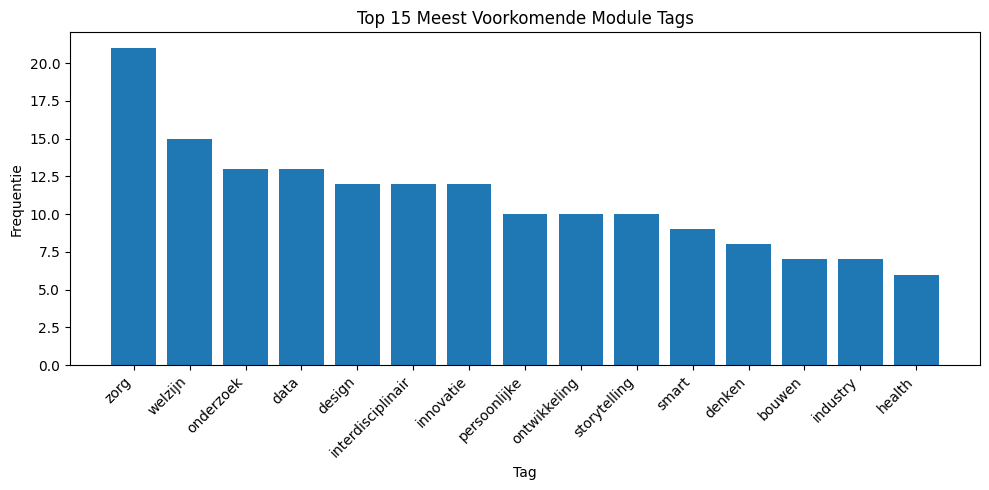

In [4]:
# # =========================
# # 2. Unieke categorieën tellen
# # =========================
# from typing import Counter


# categorical_cols = ['level', 'location', 'module_tags']

# print("=== Aantal unieke waarden per categorische kolom ===")
# for col in categorical_cols:
#     print(f"{col}: {df[col].nunique()} unieke waarden")
# print()

# # =========================
# # 3. Frequentie per level
# # =========================
# print("=== Frequentie per level ===")
# print(df['level'].value_counts())
# print()

# # Barplot level
# plt.figure(figsize=(6, 4))
# df['level'].value_counts().plot(kind='bar')
# plt.xlabel("Level")
# plt.ylabel("Aantal modules")
# plt.title("Frequentie per Level")
# plt.tight_layout()
# plt.show()

# # =========================
# # 4. Frequentie per locatie
# # =========================
# print("=== Frequentie per locatie ===")
# print(df['location'].value_counts())
# print()

# # Barplot locatie
# plt.figure(figsize=(8, 4))
# df['location'].value_counts().plot(kind='bar')
# plt.xlabel("Locatie")
# plt.ylabel("Aantal modules")
# plt.title("Frequentie per Locatie")
# plt.tight_layout()
# plt.show()

# # =========================
# # 5. Modules zonder tags
# # =========================
# # Leeg = NaN of lege string

df = pd.read_csv("Uitgebreide_VKM_dataset_cleaned2.csv")

missing_tags = df['module_tags'].isna().sum() + (df['module_tags'] == "").sum()
print("=== Modules zonder module_tags ===")
print("Aantal modules zonder tags:", missing_tags)
print()

# =========================
# 6. Meest voorkomende woorden in module_tags
# =========================
tag_counter = Counter()

for tags in df['module_tags'].dropna():
    if isinstance(tags, str):
        # Voorbeeldformaat: "['tag1', 'tag2']" -> schoonmaken
        cleaned = tags.replace("[", "").replace("]", "").replace("'", "")
        parts = [t.strip() for t in cleaned.split(",") if t.strip()]
        tag_counter.update(parts)

top_n = 15
top_tags = tag_counter.most_common(top_n)

print(f"=== Top {top_n} meest voorkomende tags ===")
for tag, count in top_tags:
    print(f"{tag}: {count}")
print()

# Barplot top-tags
if top_tags:
    tags, counts = zip(*top_tags)

    plt.figure(figsize=(10, 5))
    plt.bar(tags, counts)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Tag")
    plt.ylabel("Frequentie")
    plt.title(f"Top {top_n} Meest Voorkomende Module Tags")
    plt.tight_layout()
    plt.show()
else:
    print("Geen tags gevonden om te plotten.")